# YELP REVIEWS ANALYSIS

Yelp is an application to provide the platform for customers to write reviews and provide a star-rating. A research indicates that a one-star increase led to 59% increase in revenue of independent restaurants. Therefore, we see great potential of Yelp dataset as a valuable insights repository

The Yelp dataset is downloaded from Kaggle website. In total, there are 5,200,000 user reviews, information on 174,000 business. we will focus on two tables which are business table and review table.

#### Attributes of business table are as following:

    -business_id: ID of the business
    -name: name of the business
    -address: address of the business
    -city: city of the business
    -latitude: latitude of the business
    -longitude: longitude of the business
    -stars: average rating of the business
    -review_count: number of reviews received
    -categories: multiple categories of the business

#### Attribues of review table are as following:

    -review_id: ID of the review
    -user_id: ID of the user
    -business_id: ID of the business
    -stars: ratings of the business
    -date: review date
    -text: review from the user
    -useful: number of users who vote a review as usefull
    -funny: number of users who vote a review as funny
    -cool: number of users who vote a review as cool

In [2]:
#import packages
#basic
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings


#visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 


#graph section
import networkx as nx
import heapq  #for getting top n number of things from list,dict

#import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import squarify
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re 
import gensim 
from gensim import corpora

# this will allow ploting inside the notebook
%matplotlib inline

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")

### READING BUSINESS DATA

In [3]:
business=pd.read_csv("../varun/yelp_business.csv")
end_time=time.time()
print("It took",end_time-start_time,"s")
business.head()

It took 1.0304210186004639 s


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


### READING REVIEW DATA  

In [4]:
reviews=pd.read_csv("../varun/yelp_review.csv")
reviews=reviews.drop(['user_id','date','useful','funny','cool'],axis=1)
end_time=time.time()
print("It took",end_time-start_time,"s")
reviews.head()

It took 69.12743210792542 s


,review_id,business_id,stars,text
0,vkVSCC7xljjrAI4UGfnKEQ,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...
1,n6QzIUObkYshz4dz2QRJTw,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...
2,MV3CcKScW05u5LVfF6ok0g,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...
3,IXvOzsEMYtiJI0CARmj77Q,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...
4,L_9BTb55X0GDtThi6GlZ6w,s2I_Ni76bjJNK9yG60iD-Q,4,Had their chocolate almond croissant and it wa...


### Star Rating Distribution of all businesses on Yelp

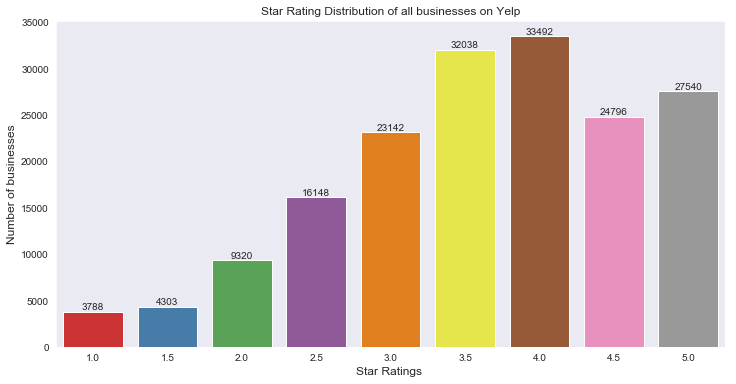

In [5]:
x=business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(12,6))
ax= sns.barplot(x.index, x.values, palette = 'Set1')
plt.title("Star Rating Distribution of all businesses on Yelp")
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### TOP CATEGORIES

There are  59106  different types/categories of Businesses in Yelp!


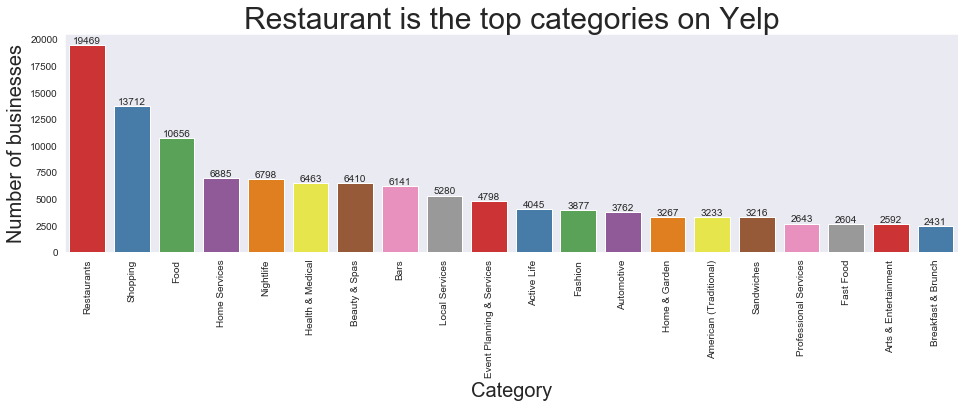

In [6]:
# What are the popular business categories?
business_cats=' '.join(business['categories'])

cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, palette = 'Set1')
plt.title("Restaurant is the top categories on Yelp",fontsize=30)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel('Number of businesses', fontsize=20)
plt.xlabel('Category', fontsize=20)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### MOST POPULAR CITY ON YELP

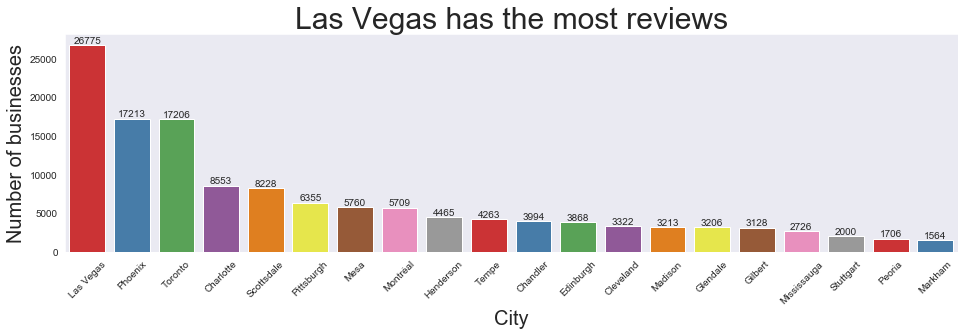

In [7]:
#Get the distribution of the ratings
x=business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, palette = 'Set1')
plt.title("Las Vegas has the most reviews",fontsize=30)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Number of businesses', fontsize=20)
plt.xlabel('City', fontsize=20)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### POSITVE REVIEWED BUSINESSES

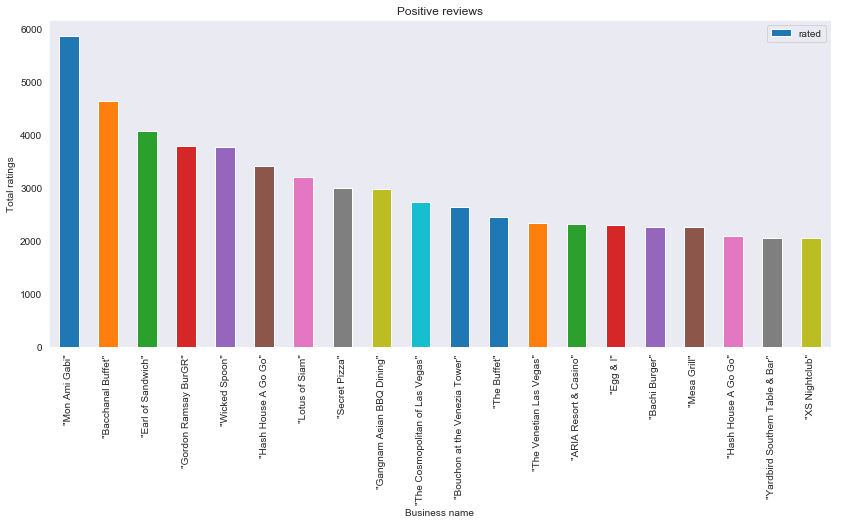

In [9]:
top_reviewed = reviews[reviews["stars"]>3]
top_reviews_dict ={}

for business_id in top_reviewed["business_id"].values:
    try :
        top_reviews_dict[business_id] =top_reviews_dict[business_id]+1
    except:
        top_reviews_dict[business_id]=1
        
topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict,orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'rated']
del(top_reviews_dict)
del(top_reviewed)

top_count= 20
right=pd.DataFrame(business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

top_business_data = pd.merge(topbusiness,right=right, how="inner",on='business_id')
top_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total ratings")

del(topbusiness)
del(right)

### NEGATIVE REVIEWED BUSINESSES

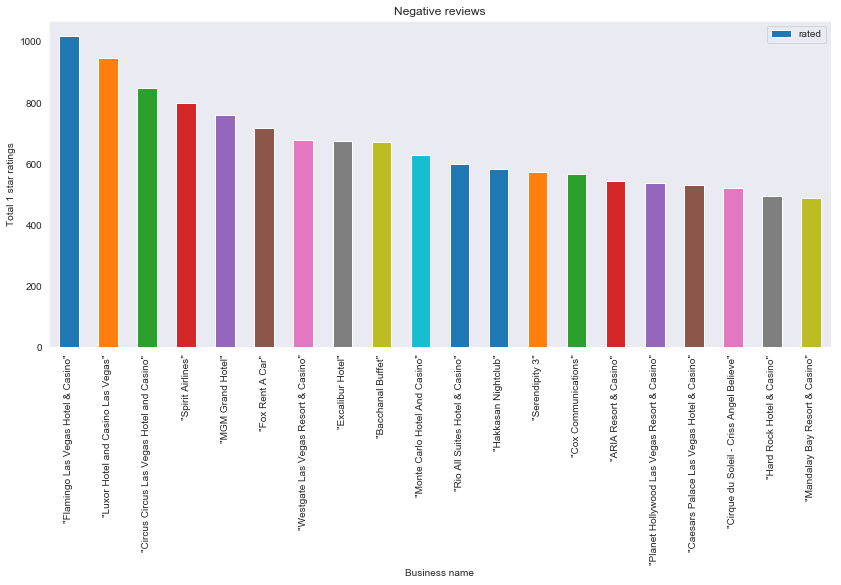

In [10]:
bottom_reviewed = reviews[reviews["stars"]<2]
bottom_reviews_dict ={} 

for business_id in bottom_reviewed["business_id"].values:
    try :
        bottom_reviews_dict[business_id] =bottom_reviews_dict[business_id]+1
    except:
        bottom_reviews_dict[business_id]=1
        
bottombusiness = pd.DataFrame.from_dict(data= bottom_reviews_dict,orient="index")

bottombusiness.reset_index(inplace=True)
#bottombusiness.head()
bottombusiness.columns = ['business_id', 'rated']

top_count= 20
right=pd.DataFrame(business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

bottom_business_data = pd.merge(bottombusiness,right=right, how="inner",on='business_id')
bottom_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Negative reviews').set_ylabel("Total 1 star ratings")

del(bottom_reviewed)
del(bottom_reviews_dict)
del(bottombusiness)
del(right)

### Joining Business and Review data files

In [11]:
yelp_review_merge = pd.merge(reviews, business, on='business_id', how='left', suffixes=('_review', '_biz'))

In [12]:
yelp_review_merge.head()

,review_id,business_id,stars_review,text,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_biz,review_count,is_open,categories
0,vkVSCC7xljjrAI4UGfnKEQ,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...,"""Wilensky's""",Plateau-Mont-Royal,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis
1,n6QzIUObkYshz4dz2QRJTw,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...,"""Tuck Shop""",Sud-Ouest,"""4662 Rue Notre-Dame O""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50,1,Restaurants;Canadian (New);Italian
2,MV3CcKScW05u5LVfF6ok0g,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...,"""Lester's Deli""",Outremont,"""1057 Avenue Bernard""",Outremont,QC,H2V 1V1,45.522144,-73.607076,4.0,70,1,Specialty Food;Food;Sandwiches;Restaurants;Bur...
3,IXvOzsEMYtiJI0CARmj77Q,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...,"""Five Guys""",Ville-Marie,"""698 Rue Sainte-Catherine O""",Montréal,QC,H3B 1B9,45.502510,-73.570119,3.5,61,1,Fast Food;Restaurants;Burgers
4,L_9BTb55X0GDtThi6GlZ6w,s2I_Ni76bjJNK9yG60iD-Q,4,Had their chocolate almond croissant and it wa...,"""Maison Christian Faure""",Ville-Marie,"""355 Place Royale""",Montréal,QC,H2Y 1Z6,45.503544,-73.554469,4.5,397,1,Bakeries;Restaurants;Food;Sandwiches;Cafes;Cof...


### Filtering Las Vegas and Restaurant as they are the most prominent on Yelp

In [13]:
business_vegas=yelp_review_merge[yelp_review_merge['city']=='Las Vegas']
business_vegas=business_vegas.reset_index(drop=True)
import re
business_vegas['restaurant']=business_vegas['categories'].str.contains('Restaurants',flags=re.IGNORECASE)
business_vegas_restaurant=business_vegas[business_vegas['restaurant']==True]
business_vegas_restaurant.head()


,review_id,business_id,stars_review,text,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_biz,review_count,is_open,categories,restaurant
3,QgSf2JvYz-M4PU2yuJjxNQ,9Jc3W0aR9Xf2gcHI0rEXsw,1,"After being scared away from Rock & Rita's, we...","""The Garden Grill""",The Strip,"""Circus Circus Las Vegas, 2800 Las Vegas Blvd S""",Las Vegas,NV,89109,36.136978,-115.163337,3.0,57,0,American (Traditional);Pub Food;Fast Food;Rest...,True
4,gN6GARS_BRr5UX2D3WAH0w,xVEtGucSRLk5pxxN0t4i6g,5,We got recommendations for this place from my ...,"""Eiffel Tower""",The Strip,"""3655 Las Vegas Blvd S""",Las Vegas,NV,89109,36.112477,-115.172189,4.0,1549,1,Steakhouses;Nightlife;Bars;French;Restaurants;...,True
5,t4oXDPN4S4USIhBGpuSD8A,2LZGeJy8qByYKB71ML-jcw,2,We got a coupon to eat here when we checked in...,"""Rock & Rita's""",The Strip,"""Circus Circus Hotel and Casino, 2800 Las Vega...",Las Vegas,NV,89109,36.136947,-115.163814,2.5,94,0,American (Traditional);Barbeque;American (New)...,True
8,R9w7GeMX_KZTV23gmI8Zjg,RhV7sraRUB3km-gF-tmDow,3,I've eaten here numerous times and am still am...,"""Roberto's Taco Shop""",Westside,"""1101 S Fort Apache Rd""",Las Vegas,NV,89117,36.158426,-115.292048,3.0,58,1,Fast Food;Restaurants;Mexican,True
13,oncT7W70CFwzzJkQoz3T5Q,NaZVUOzqk5b-l0mlki-9Og,4,We stopped in here for lunch this afternoon. S...,"""Chun Fai Chinese Eatery""",Spring Valley,"""6565 S Fort Apache Rd, Ste 175""",Las Vegas,NV,89148,36.068968,-115.298684,3.5,180,1,Food;Soup;Restaurants;Chinese;Thai;Bubble Tea,True


### TOPIC MODELING
#### Latent Dirichlet Allocation (LDA)

The LDA is based upon two general assumptions:

    -Documents that have similar words usually have the same topic
    -Documents that have groups of words frequently occurring together usually have the same topic.

#### Taking only 20000 review data

In [14]:
reviews_datasets = reviews.head(20000)  
reviews_datasets.dropna()
reviews_datasets.head()


,review_id,business_id,stars,text
0,vkVSCC7xljjrAI4UGfnKEQ,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...
1,n6QzIUObkYshz4dz2QRJTw,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...
2,MV3CcKScW05u5LVfF6ok0g,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...
3,IXvOzsEMYtiJI0CARmj77Q,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...
4,L_9BTb55X0GDtThi6GlZ6w,s2I_Ni76bjJNK9yG60iD-Q,4,Had their chocolate almond croissant and it wa...


In [15]:
reviews_datasets['text'][200]  

"I often stop here for my coffee on the way into work and to get gas. Service is usually fast and friendly. They have a fairly regular staff here who all know what they're doing."

Create vocabulary of all the words in the data and
Include those words that appear in less than 80% of the document and appear in at least 2 documents

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')  
doc_term_matrix = count_vect.fit_transform(reviews_datasets['text'].values.astype('U'))  


In [17]:
doc_term_matrix

<20000x23052 sparse matrix of type '<class 'numpy.int64'>'
	with 963659 stored elements in Compressed Sparse Row format>

LDA to create topics along with the probability distribution for each word in our vocabulary for each topic

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)  
LDA.fit(doc_term_matrix)  


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [19]:
#Fetching words randomly to check that the words are present in the vocabulary
import random

for i in range(10):  
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

donne
duchess
hands
principal
honeydew
palpable
license
gutted
aesthetic
yess


Find top 20 words with highest probability of 5 topics

In [20]:
first_topic = LDA.components_[0]  
second_topic = LDA.components_[1]
third_topic = LDA.components_[2] 
fourth_topic = LDA.components_[3]
fifth_topic = LDA.components_[4]

In [21]:
#Sorting the index according to probability

top_topic_words_first = first_topic.argsort()[-20:] 
top_topic_words_second = second_topic.argsort()[-20:]  
top_topic_words_third = third_topic.argsort()[-20:]  
top_topic_words_fourth = fourth_topic.argsort()[-20:]  
top_topic_words_fifth = fifth_topic.argsort()[-20:]  


In [22]:
top_topic_words_first
top_topic_words_second
top_topic_words_third
top_topic_words_fourth
top_topic_words_fifth

array([16315, 16167, 11988, 21531,  5860, 14672, 10960,  6203, 15575,
       20067, 10232, 11762,  3221, 17683,  5159,  7261,  3983, 11648,
       11472,  7278])

### TOPIC -1
TALKS ABOUT ASPECTS ABOUR SERVICE, WAIT TIME 

In [23]:
for i in top_topic_words_first:  
    print(count_vect.get_feature_names()[i])


went
really
did
server
wait
didn
got
minutes
like
table
came
restaurant
ordered
order
good
just
place
time
service
food


### TOPIC - 2
TALKS MOSTLY ABOUT ASPECTS ABOUT FOOD - CHEESE,CHICKEN,FOOD,MENU,DELICIOUS

In [24]:
for i in top_topic_words_second:  
    print(count_vect.get_feature_names()[i])


pretty
definitely
time
cheese
nice
ve
little
menu
delicious
love
try
service
chicken
just
really
like
great
place
food
good


### TOPIC - 3 
TALKS MOSTLY ABOUT SERVICE, AMBIENCE, AGAIN GOING BACK TO THE RESTAURANT

In [25]:
for i in top_topic_words_third:  
    print(count_vect.get_feature_names()[i])


place
staff
experience
went
day
job
new
got
just
called
recommend
said
customer
told
work
car
did
great
time
service


### TOPIC - 4 
TALKS ABOUT RESTAURANT AND EXPERIENCE(NO FOOD, NOO SERVICE)

In [26]:
for i in top_topic_words_fourth:  
    print(count_vect.get_feature_names()[i])


day
area
pretty
know
staff
love
little
good
people
nice
room
ve
store
don
really
great
time
just
place
like


### TOPIC - 5
TALKS ABOUT DESERTS (CHOCOLATE CREAM,SWEET,ICE,CAKE)  

In [27]:
for i in top_topic_words_fifth:  
    print(count_vect.get_feature_names()[i])


ramen
que
lobster
une
des
pas
je
dish
pour
sweet
ice
les
cake
sauce
cream
est
chocolate
le
la
et


In [28]:
#Words with highest probabilties for all five topics
for i,topic in enumerate(LDA.components_):  
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')


Top 10 words for topic #0:
['came', 'restaurant', 'ordered', 'order', 'good', 'just', 'place', 'time', 'service', 'food']


Top 10 words for topic #1:
['try', 'service', 'chicken', 'just', 'really', 'like', 'great', 'place', 'food', 'good']


Top 10 words for topic #2:
['recommend', 'said', 'customer', 'told', 'work', 'car', 'did', 'great', 'time', 'service']


Top 10 words for topic #3:
['room', 've', 'store', 'don', 'really', 'great', 'time', 'just', 'place', 'like']


Top 10 words for topic #4:
['ice', 'les', 'cake', 'sauce', 'cream', 'est', 'chocolate', 'le', 'la', 'et']




In [64]:
#assign probability of all the topics to each document and adds a new column to show about which topic the review belongs
topic_values = LDA.transform(doc_term_matrix)  
reviews_datasets['Topic'] = topic_values.argmax(axis=1)  
reviews_datasets.head(10)


,review_id,business_id,stars,text,Topic
0,vkVSCC7xljjrAI4UGfnKEQ,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...,1
1,n6QzIUObkYshz4dz2QRJTw,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...,1
2,MV3CcKScW05u5LVfF6ok0g,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...,1
3,IXvOzsEMYtiJI0CARmj77Q,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...,1
4,L_9BTb55X0GDtThi6GlZ6w,s2I_Ni76bjJNK9yG60iD-Q,4,Had their chocolate almond croissant and it wa...,4
5,HRPm3vEZ_F-33TYVT7Pebw,8QWPlVQ6D-OExqXoaD2Z1g,5,Cycle Pub Las Vegas was a blast! Got a groupon...,3
6,ymAUG8DZfQcFTBSOiaNN4w,9_CGhHMz8698M9-PkVf0CQ,4,Who would have guess that you would be able to...,1
7,8UIishPUD92hXtScSga_gw,gkCorLgPyQLsptTHalL61g,4,Always drove past this coffee house and wonder...,1
8,w41ZS9shepfO3uEyhXEWuQ,5r6-G9C4YLbC7Ziz57l3rQ,3,"Not bad!! Love that there is a gluten-free, ve...",1
9,WF_QTN3p-thD74hqpp2j-Q,fDF_o2JPU8BR1Gya--jRIA,5,Love this place!\n\nPeggy is great with dogs a...,3


In [49]:
#Topic - 5 - chocolate,deserts
reviews_datasets['text'][4]

"Lester's is located in a beautiful neighborhood and has been there since 1951. They are known for smoked meat which most deli's have but their brisket sandwich is what I come to montreal for. They've got about 12 seats outside to go along with the inside. \n\nThe smoked meat is up there in quality and taste with Schwartz's and you'll find less tourists at Lester's as well."

In [67]:
#Topic - 4 - experience at the restaurant
reviews_datasets['text'][9]

'Love this place!\n\nPeggy is great with dogs and does a great job! She is very patience with him and will make any adjustments you need before you leave the store. My little guy has no problems coming here.\n\nThey also have very good bully sticks (the non-smelly ones) that my little guy and his friends love!'

In [66]:
#Topic - 2 - food
reviews_datasets['text'][8]

"Not bad!! Love that there is a gluten-free, vegan version of the cheese curds and gravy!!\n\nHaven't done the poutine taste test yet with smoke's but Im excited to see which is better. However poutini's might win as they are vegan and gluten-free"

EACH TOPIC NUMBER IS ASSISGNED TO RESPECTIVE REVIEW BASED ON THE ASPECT THAT THE IS MENTIONED MOST IN THE REVIEW